In [47]:
from umap import UMAP
from sklearn.manifold import TSNE, MDS
from sklearn.metrics.pairwise import manhattan_distances

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Section 1 Load and prep the Data 

In [48]:
# get Data
train_df = pd.read_json('Twibot-20/data_creation/test_df_stage_1.json')

sentement_dict = {
    'Positive': 1,
    'Negative': 0
}

train_df['sentiment'] = train_df['sentiment'].apply(lambda x: sentement_dict[x])

X = train_df.drop(['ID', 'profile', 'tweet', 'neighbor', 'domain', 'label'], axis=1)
y = train_df.loc[:, 'label']
X.sample(5)

,nn_signal,lang_count,tweet_min_len,tweet_max_len,tweet_av_len,tweet_len_std,user_name_len,screen_name_len,user_name_chars,protected,...,days_old,listed_count,statuses_count,description_len,sentiment,similarity,num_mentions,num_links,retweet,num_tweets
204,0.849202,1,19,298,120.240000,68.538182,15,14,12,0,...,3868,890,41296,161,1,0.743954,0.055000,0.530000,0.000000,200
1150,0.659876,1,19,289,146.261307,78.381826,18,16,12,0,...,2899,10,1211,29,1,0.779618,0.954774,0.206030,0.185930,199
331,0.644462,3,19,304,123.775510,49.052560,4,7,4,0,...,4759,24,13506,106,1,0.719720,2.505102,0.193878,0.658163,196
224,0.538866,1,18,308,139.810000,80.489402,10,13,8,0,...,2952,339,3009,39,1,0.664570,0.965000,0.655000,0.080000,200
765,0.321408,1,4,153,49.500000,33.994318,10,16,9,0,...,1086,0,23,60,0,0.478187,0.045455,0.272727,0.000000,22


### Section 2 Plots Using Unsupervised Dimensionality Reduction

#### Section 2.1 Multidimensional Scaling (MDS)

In [49]:
# MDS Preserves distance
def plot_mds(X, y, use_manhatten = False):
    if use_manhatten:
        X = manhattan_distances(X)
        distance = 'Manhattan'
        mds_feats = MDS(dissimilarity='precomputed').fit_transform(X)
    else:
        mds_feats = MDS().fit_transform(X)
        distance = 'Euclidean'
    
    mds_dataframe = pd.concat([pd.DataFrame(mds_feats), pd.Series(y)], axis=1, ignore_index=True)
    mds_dataframe.columns = ['First MDS Feature', 'Second MDS Feature', 'Label']

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x='First MDS Feature', y='Second MDS Feature', hue='Label', data=mds_dataframe, ax=ax)
    ax.set_title(f'Multidimensional Scaling using {distance} distance')

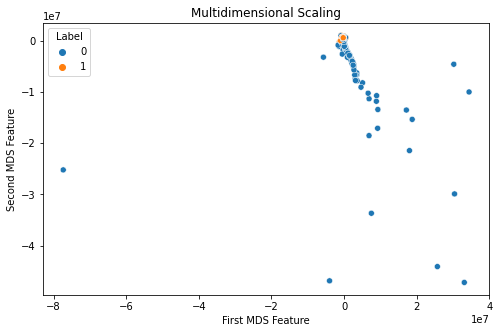

In [50]:
plot_mds(X, y, use_manhatten=True)

#### Section 2.2 t-distributed Stochastic Neighbor Embedding (t-SNE)

In [70]:
# t-SNEE preserves local distance not global distance thus should only be used for visualization
# does not preserve cluster separation or density
def plot_tsne(X, y, perplexity=30.0, ax=None):
    tsne_feats = TSNE(perplexity=perplexity).fit_transform(X)
    tsne_dataframe = pd.concat([pd.DataFrame(tsne_feats), pd.Series(y)], axis=1, ignore_index=True)
    tsne_dataframe.columns = ['First TSNE Feature', 'Second TSNE Feature', 'Label']

    ax = sns.scatterplot(x='First TSNE Feature', y='Second TSNE Feature', hue='Label', data=tsne_dataframe, ax=ax)
    ax.set_title(f't-distributed Stochastic Neighbor Embedding\nwith perplexity={perplexity}')

c:\ProgramData\Anaconda3\envs\ML_w_tf_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\ML_w_tf_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\ML_w_tf_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\ML_w_tf_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\ML_w_tf_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.wa

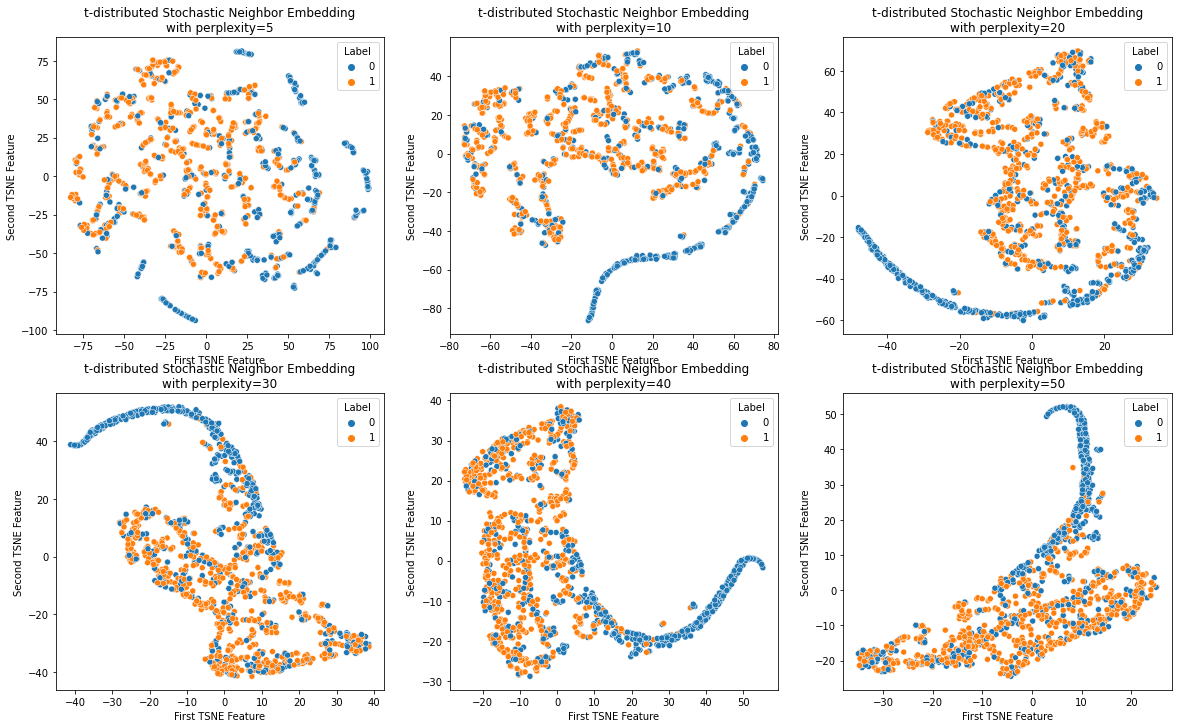

In [71]:
perplexity = [5, 10, 20, 30, 40, 50]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for index, ax in enumerate(axes.flatten()):
    plot_tsne(X, y, perplexity=perplexity[index], ax=ax)
plt.tight_layout()

#### Section 2.3 Uniform Manifold Approximation and Projection (UMAP)

In [54]:
# Umap appropriate for both visualization and dimensionality reduction 
# preserves local structure and better than t-SNEE at preserving global structure
def plot_umap(X, y):
    umap_feats = UMAP().fit_transform(X)
    umap_dataframe = pd.concat([pd.DataFrame(umap_feats), pd.Series(y)], axis=1, ignore_index=True)
    umap_dataframe.columns = ['First UMAP Feature', 'Second UMAP Feature', 'Label']

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x='First UMAP Feature', y='Second UMAP Feature', hue='Label', data=umap_dataframe, ax=ax)
    ax.set_title('Uniform Manifold Approximation and Projection')

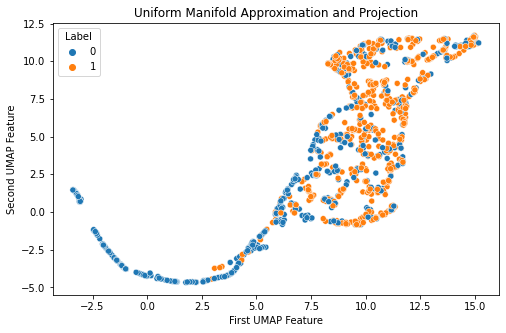

In [55]:
plot_umap(X, y)